In [8]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# Load the images.
orig_img = Image.open("/home/weiwu/share/Test/Lenna.png")
corr_img = Image.open("/home/weiwu/share/Test/lena512_corrupted.png")


# Convert to arrays.
Uorig = np.array(orig_img)
Ucorr = np.array(corr_img)


In [9]:
Uorig.shape

(512, 512, 3)

/home/weiwu/.pyenv/versions/anaconda3-4.4.0/lib/python3.6/site-packages/ipykernel_launcher.py:8: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  


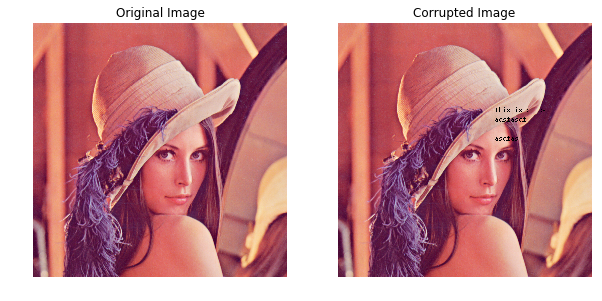

In [11]:
rows, cols, level = Uorig.shape

# Known is 1 if the pixel is known,
# 0 if the pixel was corrupted.
Known = np.zeros((rows, cols))
for i in range(rows):
    for j in range(cols):
         if Uorig[i, j] == Ucorr[i, j]:
            Known[i, j] = 1

%matplotlib inline
fig, ax = plt.subplots(1, 2,figsize=(10, 5))
ax[0].imshow(orig_img);
ax[0].set_title("Original Image")
ax[0].axis('off')
ax[1].imshow(corr_img);
ax[1].set_title("Corrupted Image")
ax[1].axis('off');


In [12]:
# Recover the original image using total variation in-painting.
from cvxpy import *
U = Variable(rows, cols)
obj = Minimize(tv(U))
constraints = [mul_elemwise(Known, U) == mul_elemwise(Known, Ucorr)]
prob = Problem(obj, constraints)
# Use SCS to solve the problem.
prob.solve(verbose=True, solver=SCS)

ValueError: shape too large to be a matrix.